In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf

In [2]:
import os

# Define the folder paths
folder_paths = [
    r"C:\cybersec-imagery\artificial intelligence\ai",
    r"C:\cybersec-imagery\bodycam\bodycamm\bodycammm",
    r"C:\cybersec-imagery\biosensing\biosensingg"
]

# Initialize lists to store images and labels
images = []
labels = []

# Function to read files from a folder
def read_files_from_folder(folder_path, label):
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        # Check if the file is a regular file
        if os.path.isfile(filepath):
            # Add the image path to the images list
            images.append(filepath)
            # Add the label to the labels list
            labels.append(label)

# Iterate over folder paths and read files
for i, folder_path in enumerate(folder_paths):
    read_files_from_folder(folder_path, label=i)

# Display the uploaded images and labels
for image, label in zip(images, labels):
    print(f"Image: {image}, Label: {label}")


Image: C:\cybersec-imagery\artificial intelligence\ai\0.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\1.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\10.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\100.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\101.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\102.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\103.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\104.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\105.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\106.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\107.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\108.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\109.JPEG, Label: 0
Image: C:\cybersec-imagery\artificial intelligence\ai\11

In [3]:
df = pd.DataFrame({'image': images, 'label': labels})
print(df)

                                                 image  label
0    C:\cybersec-imagery\artificial intelligence\ai...      0
1    C:\cybersec-imagery\artificial intelligence\ai...      0
2    C:\cybersec-imagery\artificial intelligence\ai...      0
3    C:\cybersec-imagery\artificial intelligence\ai...      0
4    C:\cybersec-imagery\artificial intelligence\ai...      0
..                                                 ...    ...
306  C:\cybersec-imagery\biosensing\biosensingg\94....      2
307  C:\cybersec-imagery\biosensing\biosensingg\95.PNG      2
308  C:\cybersec-imagery\biosensing\biosensingg\97....      2
309  C:\cybersec-imagery\biosensing\biosensingg\98....      2
310  C:\cybersec-imagery\biosensing\biosensingg\99....      2

[311 rows x 2 columns]


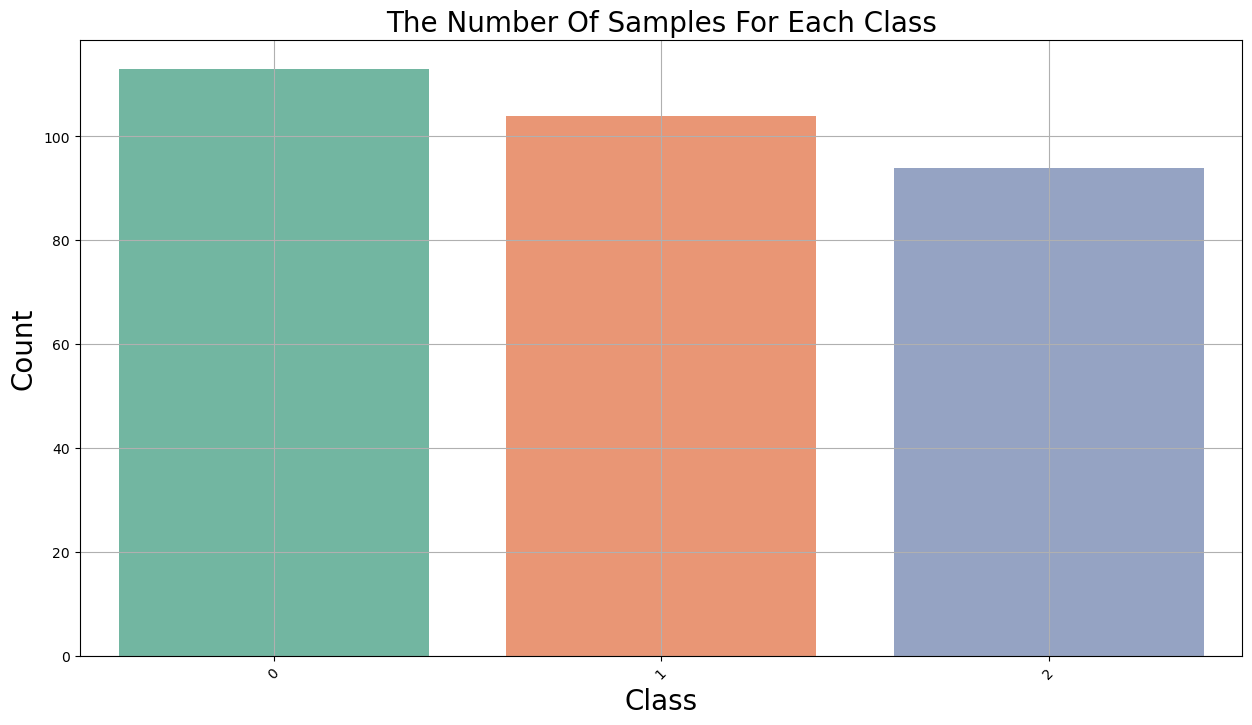

In [4]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set2')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [5]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)



In [6]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.3, random_state=42,shuffle=True,stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (224,224)
batch_size = 32
# Define parameters for image data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

# Convert numerical labels to strings
df_train['label'] = df_train['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)
df_val['label'] = df_val['label'].astype(str)

# Now, you can create the generators
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 217 validated image filenames belonging to 3 classes.
Found 47 validated image filenames belonging to 3 classes.
Found 47 validated image filenames belonging to 3 classes.


In [8]:
print(labels[:10])  # Print first 10 labels to verify encoding


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
batch_data, batch_labels = next(train_generator)
print(batch_data.shape)  # Print shape of batch data
print(batch_labels.shape)  # Print shape of batch labels


(32, 224, 224, 3)
(32, 3)


In [10]:
# Print first few samples and labels from your dataset
for i in range(5):
    print("Sample:", images[i])
    print("Label:", labels[i])
    print()


Sample: C:\cybersec-imagery\artificial intelligence\ai\0.JPEG
Label: 0

Sample: C:\cybersec-imagery\artificial intelligence\ai\1.JPEG
Label: 0

Sample: C:\cybersec-imagery\artificial intelligence\ai\10.JPEG
Label: 0

Sample: C:\cybersec-imagery\artificial intelligence\ai\100.JPEG
Label: 0

Sample: C:\cybersec-imagery\artificial intelligence\ai\101.JPEG
Label: 0



In [11]:
import numpy as np
unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique Labels:", unique_labels)
print("Label Counts:", label_counts)


Unique Labels: [0 1 2]
Label Counts: [113 104  94]


vGG16

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))

# Adjust the output layer to match the number of classes
num_classes = 3
model.add(Dense(units=num_classes, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                

In [13]:
checkpoint_cb = ModelCheckpoint("vgg16_model.h5", save_best_only=True)

In [14]:
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

In [15]:
# Assuming you have training and validation data generators defined

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
#     callbacks=[checkpoint_cb, early_stopping_cb]
)

# Optionally, you can evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20


7/7 [==============================] - 351s 53s/step - loss: 1.6527 - accuracy: 0.3318 - val_loss: 1.0943 - val_accuracy: 0.3617
Epoch 2/20
7/7 [==============================] - 282s 41s/step - loss: 1.1061 - accuracy: 0.3641 - val_loss: 1.0825 - val_accuracy: 0.3404
Epoch 3/20
7/7 [==============================] - 342s 48s/step - loss: 1.2243 - accuracy: 0.3641 - val_loss: 1.0959 - val_accuracy: 0.3617
Epoch 4/20
7/7 [==============================] - 294s 43s/step - loss: 1.0982 - accuracy: 0.3641 - val_loss: 1.0956 - val_accuracy: 0.3617
Epoch 5/20
7/7 [==============================] - 324s 48s/step - loss: 1.0972 - accuracy: 0.3641 - val_loss: 1.0955 - val_accuracy: 0.3617
Epoch 6/20
7/7 [==============================] - 324s 48s/step - loss: 1.0976 - accuracy: 0.3641 - val_loss: 1.0962 - val_accuracy: 0.3617
Epoch 7/20
7/7 [==============================] - 379s 58s/step - loss: 1.0963 - accuracy: 0.3641 - val_loss: 1.0957 - val_accuracy: 0.3617
Epoch 8/20
7/7 [==

In [17]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # list all data in training
# print(training.history.keys())
# # summarize training for accuracy
# plt.plot(training.history['accuracy'])
# plt.plot(training.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize traning for loss
# plt.plot(training.history['loss'])
# plt.plot(training.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [18]:
model.save("vgg16_model")  # Save without the file extension

INFO:tensorflow:Assets written to: vgg16_model\assets


INFO:tensorflow:Assets written to: vgg16_model\assets


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the trained ResNet50 model
model = load_model("vgg16_model")

# Load and preprocess the new image
img_path = r"C:\cybersec-imagery\artificial intelligence\ai\41.JPEG"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)

# Extract probabilities from raw predictions
probabilities = [f'{prob * 100:.2f}%' if prob > 1e-6 else '<very close to zero>' for prob in predictions[0]]

# Print probabilities for each class
for i, prob in enumerate(probabilities):
    print(f"Probability of class {i + 1}: {prob}")


1/1 [==============================] - 1s 1s/step
Probability of class 1: 47.98%
Probability of class 2: 33.90%
Probability of class 3: 18.12%


Resnet50

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input image size
img_size = (224, 224)
# Define number of classes
num_classes = 3  # Adjust this based on your dataset

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators for training and validation

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator))

# Save the trained model
model.save("resnet50_model.h5")


Epoch 1/20
7/7 [==============================] - 25s 3s/step - loss: 1.8909 - accuracy: 0.3226 - val_loss: 1.8955 - val_accuracy: 0.3404
Epoch 2/20
7/7 [==============================] - 46s 7s/step - loss: 1.4743 - accuracy: 0.3456 - val_loss: 1.1971 - val_accuracy: 0.3404
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 1.0484 - accuracy: 0.3779 - val_loss: 0.9820 - val_accuracy: 0.5319
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.9370 - accuracy: 0.5806 - val_loss: 0.9564 - val_accuracy: 0.5106
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.8794 - accuracy: 0.6221 - val_loss: 0.8646 - val_accuracy: 0.5957
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.8477 - accuracy: 0.6221 - val_loss: 0.8334 - val_accuracy: 0.6170
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.8040 - accuracy: 0.6590 - val_loss: 0.8043 - val_accuracy: 0.7234
Epoch 8/20
7/7 [==================

E:\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 3s 906ms/step - loss: 0.6188 - accuracy: 0.8298
Test Loss: 0.6187862157821655
Test Accuracy: 0.8297872543334961


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the trained ResNet50 model
model = load_model("resnet50_model.h5")

# Load and preprocess the new image
img_path = r"C:\cybersec-imagery\artificial intelligence\ai\41.JPEG"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)

print("Raw predictions:", predictions)


1/1 [==============================] - 1s 1s/step
Raw predictions: [[9.9992943e-01 3.4051859e-12 7.0520669e-05]]


In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the trained ResNet50 model
model = load_model("resnet50_model.h5")

# Load and preprocess the new image
img_path = r"C:\cybersec-imagery\artificial intelligence\ai\41.JPEG"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)

# Extract probabilities from raw predictions
probabilities = [f'{prob * 100:.2f}%' if prob > 1e-6 else '<very close to zero>' for prob in predictions[0]]

# Print probabilities for each class
for i, prob in enumerate(probabilities):
    print(f"Probability of class {i + 1}: {prob}")


1/1 [==============================] - 1s 1s/step
Probability of class 1: 99.99%
Probability of class 2: <very close to zero>
Probability of class 3: 0.01%


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # list all data in training
# print(training.history.keys())
# # summarize training for accuracy
# plt.plot(training.history['accuracy'])
# plt.plot(training.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize traning for loss
# plt.plot(training.history['loss'])
# plt.plot(training.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

Inception V3 

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input image size
img_size = (224, 224)
# Define number of classes
num_classes = 3  # Adjust this based on your dataset

# Load pre-trained InceptionV3 model without top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators for training and validation

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator))

# Save the trained model
model.save("inceptionv3_model.h5")


Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 2.1505 - accuracy: 0.5945 - val_loss: 1.0272 - val_accuracy: 0.7872
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.4990 - accuracy: 0.8618 - val_loss: 0.2892 - val_accuracy: 0.8936
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.2277 - accuracy: 0.9263 - val_loss: 0.3073 - val_accuracy: 0.9149
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.2268 - val_accuracy: 0.9362
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.0497 - accuracy: 0.9816 - val_loss: 0.3411 - val_accuracy: 0.8936
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.1351 - val_accuracy: 0.9574
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9787
Epoch 8/20
7/7 [==================

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the trained ResNet50 model
model = load_model("inceptionv3_model.h5")

# Load and preprocess the new image
img_path = r"C:\cybersec-imagery\biosensing\biosensingg\51.JPEG"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)

# Extract probabilities from raw predictions
probabilities = [f'{prob * 100:.2f}%' if prob > 1e-6 else '<very close to zero>' for prob in predictions[0]]

# Print probabilities for each class
for i, prob in enumerate(probabilities):
    print(f"Probability of class {i + 1}: {prob}")


1/1 [==============================] - 2s 2s/step
Probability of class 1: <very close to zero>
Probability of class 2: <very close to zero>
Probability of class 3: 100.00%


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # list all data in training
# print(training.history.keys())
# # summarize training for accuracy
# plt.plot(training.history['accuracy'])
# plt.plot(training.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize traning for loss
# plt.plot(training.history['loss'])
# plt.plot(training.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

CNN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(299, 299, 3)))  # 64 neurons with 3*3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling2D helps to reduce the size of the data
model.add(Flatten())  # Converts multi-dimensional array to 1D channel
model.add(Dense(64))  # 64 neurons in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1))  # Output layer
model.add(Activation('sigmoid'))  # Sigmoid activation function
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 297, 297, 64)      1792      
                                                                 
 activation_94 (Activation)  (None, 297, 297, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 148, 148, 64)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1401856)           0         
                                                                 
 dense_7 (Dense)             (None, 64)                89718848  
                                                                 
 activation_95 (Activation)  (None, 64)                0         
                                                      

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [29]:
training = model.fit(
    train_generator,
    steps_per_epoch=204 // batch_size,  # Adjusted steps_per_epoch
    epochs=20,
    validation_data=val_generator,
    validation_steps=49 // batch_size,  # Adjusted validation_steps
)



Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node sequential_2/activation_95/Relu defined at (most recent call last):
  File "E:\anaconda3\lib\runpy.py", line 196, in _run_module_as_main

  File "E:\anaconda3\lib\runpy.py", line 86, in _run_code

  File "E:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "E:\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "E:\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "E:\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever

  File "E:\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once

  File "E:\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "E:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "E:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code

  File "C:\Users\vaide\AppData\Local\Temp\ipykernel_11388\1684514553.py", line 1, in <module>

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "E:\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "E:\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\layers\core\activation.py", line 59, in call

  File "E:\anaconda3\lib\site-packages\keras\src\activations.py", line 306, in relu

  File "E:\anaconda3\lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,788544], In[1]: [1401856,64]
	 [[{{node sequential_2/activation_95/Relu}}]] [Op:__inference_train_function_58700]

In [ ]:
import matplotlib.pyplot as plt

# List all data in training
print(history.history.keys())

# Summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize training for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [30]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 148, 148, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 35, 35, 128)      

In [34]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sequential_3/dense_9/Relu defined at (most recent call last):
  File "E:\anaconda3\lib\runpy.py", line 196, in _run_module_as_main

  File "E:\anaconda3\lib\runpy.py", line 86, in _run_code

  File "E:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "E:\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "E:\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "E:\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever

  File "E:\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once

  File "E:\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "E:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "E:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "E:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell

  File "E:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes

  File "E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code

  File "C:\Users\vaide\AppData\Local\Temp\ipykernel_11388\3965586771.py", line 2, in <module>

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "E:\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "E:\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\anaconda3\lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "E:\anaconda3\lib\site-packages\keras\src\activations.py", line 306, in relu

  File "E:\anaconda3\lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,18432], In[1]: [32768,512]
	 [[{{node sequential_3/dense_9/Relu}}]] [Op:__inference_train_function_60519]